<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pricing-Barrier-options" data-toc-modified-id="Pricing-Barrier-options-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pricing Barrier options</a></span><ul class="toc-item"><li><span><a href="#Simulations-of-Stock-Prices" data-toc-modified-id="Simulations-of-Stock-Prices-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Simulations of Stock Prices</a></span><ul class="toc-item"><li><span><a href="#Plot-of-all-simulations" data-toc-modified-id="Plot-of-all-simulations-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Plot of all simulations</a></span></li></ul></li><li><span><a href="#Vanilla-Call" data-toc-modified-id="Vanilla-Call-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Vanilla Call</a></span></li><li><span><a href="#Down-and-Out-with-$H-<-K$" data-toc-modified-id="Down-and-Out-with-$H-<-K$-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Down and Out with $H &lt; K$</a></span></li><li><span><a href="#Vanilla-and-Barrier-Option-Prices" data-toc-modified-id="Vanilla-and-Barrier-Option-Prices-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Vanilla and Barrier Option Prices</a></span><ul class="toc-item"><li><span><a href="#Plots-for-both-Barrier-and-Vanilla-Options" data-toc-modified-id="Plots-for-both-Barrier-and-Vanilla-Options-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Plots for both Barrier and Vanilla Options</a></span></li><li><span><a href="#Remarks" data-toc-modified-id="Remarks-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Remarks</a></span></li></ul></li></ul></li><li><span><a href="#Pricing-Asian-options" data-toc-modified-id="Pricing-Asian-options-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pricing Asian options</a></span><ul class="toc-item"><li><span><a href="#Plot-of-Arithmetic-Average-with-Realization." data-toc-modified-id="Plot-of-Arithmetic-Average-with-Realization.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Plot of Arithmetic Average with Realization.</a></span></li><li><span><a href="#Monte-Carlo-Simulation-for-Stock-Prices" data-toc-modified-id="Monte-Carlo-Simulation-for-Stock-Prices-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Monte-Carlo Simulation for Stock Prices</a></span></li><li><span><a href="#Pricing-Asian-Options-for-each-t---First-Method" data-toc-modified-id="Pricing-Asian-Options-for-each-t---First-Method-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Pricing Asian Options for each t - First Method</a></span><ul class="toc-item"><li><span><a href="#Remarks---First-Method" data-toc-modified-id="Remarks---First-Method-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Remarks - First Method</a></span></li></ul></li><li><span><a href="#Pricing-Asian-Options-for-each-t---Second-Method" data-toc-modified-id="Pricing-Asian-Options-for-each-t---Second-Method-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Pricing Asian Options for each t - Second Method</a></span><ul class="toc-item"><li><span><a href="#Vanilla---Asian-Prices-using-100-simulations-at-each-step" data-toc-modified-id="Vanilla---Asian-Prices-using-100-simulations-at-each-step-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Vanilla - Asian Prices using 100 simulations at each step</a></span></li><li><span><a href="#Vanilla---Asian-Prices-using-1000-simulations-at-each-step" data-toc-modified-id="Vanilla---Asian-Prices-using-1000-simulations-at-each-step-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Vanilla - Asian Prices using 1000 simulations at each step</a></span></li><li><span><a href="#Remarks---Second-Method" data-toc-modified-id="Remarks---Second-Method-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Remarks - Second Method</a></span></li></ul></li></ul></li></ul></div>

***Asian-Barrier Option Pricing***

***Guneykan Ozkaya***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Pricing Barrier options

Consider a one-year down-and-out call struck at 103 with $S_0= 100$, $\sigma= 0.2$ and $r= 0.1$ , barrier at 90 with daily setting dates.

***Defining all constant variables***

In [2]:
s_0 = 100  # Initial spot
vol = 0.2  # Volatility
r = 0.1  # Risk-Free
n = 365  # Steps
T = 1  #  Maturity
K = 103  # Strike
H = 90  # Barrier

## Simulations of Stock Prices

In [3]:
def calculate_spot(prev, sigma, r, step, random):

    return(prev + (sigma*prev*random) + (r*prev*step))


def sim_spot(s0, r, steps, maturity, vol):
    delta_t = maturity/steps
    prices = [s0]
    normal_dist = np.random.normal(0, np.sqrt(delta_t), steps)
    for a in range(steps):
        prices.append(calculate_spot(
            prices[-1], vol, r, delta_t, normal_dist[a]))
    return(prices)

In [4]:
sims = pd.DataFrame()  # DataFrame for simulations
for a in range(5):  # Generating Stock Prices
    sims[a] = sim_spot(s_0, r, n, T, vol)

sims.columns = ["Sim_1", "Sim_2", "Sim_3", "Sim_4", "Sim_5"]
sims.index = pd.date_range(
    start='31/12/2017', end='31/12/2018', freq="D")  #  Daily Frequency
sims["Steps"] = np.linspace(0, 1, 366)  # Delta_t

### Plot of all simulations

/Users/guneykan/anaconda3/envs/nlp/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Prices'),
 Text(0.5, 0, 'Steps'),
 Text(0.5, 1.0, 'All Simulations')]

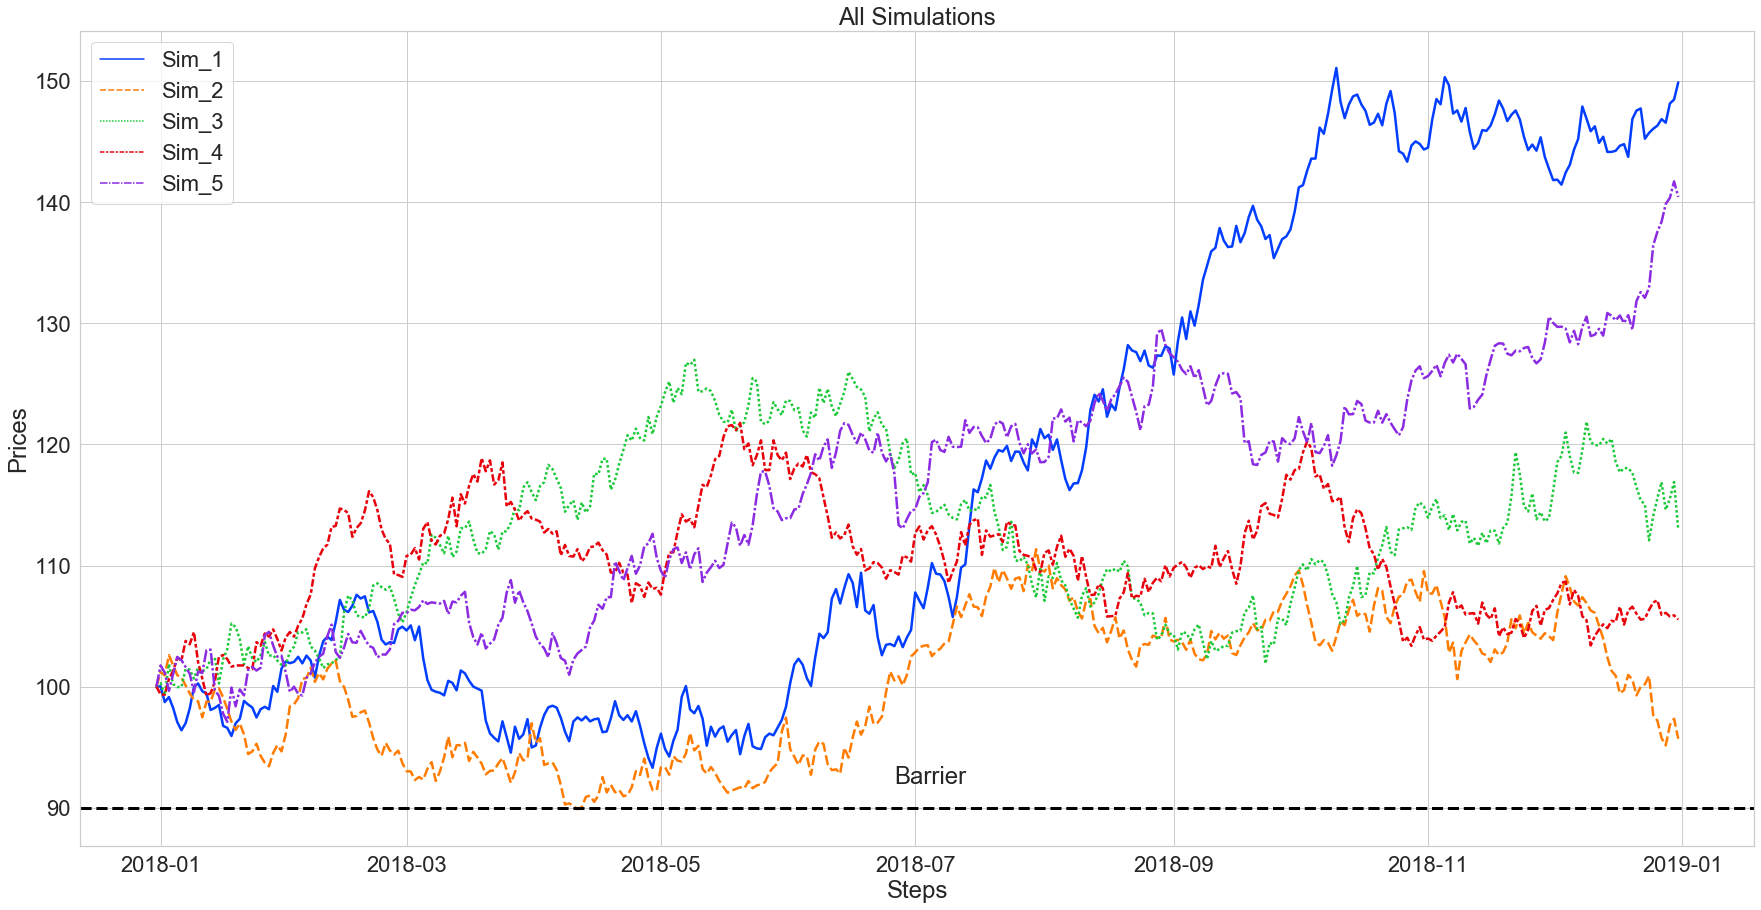

In [5]:
sns.set(style="whitegrid", font_scale=2)
plt.figure(figsize=(30, 15))
ax = sns.lineplot(data=sims[["Sim_1", "Sim_2", "Sim_3",
                             "Sim_4", "Sim_5"]], palette="bright", linewidth=2.5)
ax.axhline(90, ls='--', linewidth=3, color='black')
ax.text("2018-06-26", 92, "Barrier")
ax.set(xlabel='Steps', ylabel='Prices', title="All Simulations")

## Vanilla Call

$$d_{1,t} = \frac{log(\frac{S_t}{K}) + (r + \frac{1}{2}\sigma^2)(T-t)}{\sigma\sqrt{T-t}}$$

$$d_{2,t} = \frac{log(\frac{S_0}{K}) + (r - \frac{1}{2}\sigma^2)(T-t)}{\sigma\sqrt{T-t}}$$

$$C_t = S_t\mathcal{N}(d_{1,t}) - e^{-r(T-t)}K\mathcal{N}(d_{2,t})$$

In [6]:
def d1(s, k, r, t, T, vol):  # d_1t
    if T != t:
        nomin = np.log(s/k) + (r + 0.5*(vol**2))*(T-t)
        denom = vol*np.sqrt((T-t))
        return(nomin/denom)
    else:
        None


def d2(s, k, r, t, T, vol):  # d_2t
    if T != t:
        nomin = np.log(s/k) + (r - 0.5*(vol**2))*(T-t)
        denom = vol*np.sqrt((T-t))
        return(nomin/denom)
    else:
        None


def vanilla(d1, d2, k, r, T, t, s):  # Vanilla Price
    if T != t:
        return(s*scipy.stats.norm.cdf(d1) - k*np.exp(-r*(T-t))*scipy.stats.norm.cdf(d2))
    else:
        return(max(s-k, 0))

## Down and Out with $H < K$

$$h_{1,t} = \frac{log(\frac{H^2}{S_tK}) + (r + \frac{1}{2}\sigma^2)(T-t)}{\sigma\sqrt{T-t}}$$

$$h_{2,t} = \frac{log(\frac{H^2}{S_tK}) + (r - \frac{1}{2}\sigma^2)(T-t)}{\sigma\sqrt{T-t}}$$

$$C_t^{d/o} = S_t \mathcal{N}(d_{1,t}) - \left(\frac{H}{S_t} \right)^{1+2r\sigma^{-2}}S_t\mathcal{N}(h_{1,t}) - e^{-r(T-t)}K\mathcal{N}(d_{2,t}) + Ke^{-r(T-t)}\left(\frac{H}{S_t} \right)^{-1+2r\sigma^{-2}}\mathcal{N}(h_{2,t})$$

In [7]:
def h1(H, k, r, t, T, vol, s):  # h_1t
    if T != t:
        nomin = np.log((H**2)/(s*k)) + (r + 0.5*(vol**2))*(T-t)
        denom = vol*np.sqrt((T-t))
        return(nomin/denom)
    else:
        None


def h2(H, k, r, t, T, vol, s):  # h_2t
    if T != t:
        nomin = np.log((H**2)/(s*k)) + (r - 0.5*(vol**2))*(T-t)
        denom = vol*np.sqrt((T-t))
        return(nomin/denom)
    else:
        None


def barrier(h1, h2, d1, d2, k, r, T, t, s, H, vol):  # Down-Out Price
    if (T != t) & (s <= H):
        return(0)
    elif (T != t) & (s > H):
        first_term = s*scipy.stats.norm.cdf(d1)
        sec_term = ((H/s)**(1+2*r*(vol**-2)))*s*scipy.stats.norm.cdf(h1)
        third_term = np.exp(-r*(T-t))*k*scipy.stats.norm.cdf(d2)
        fourth_term = k*np.exp(-r*(T-t))*((H/s) **
                                          (-1+2*r*(vol**-2)))*scipy.stats.norm.cdf(h2)
        return(first_term - sec_term - third_term + fourth_term)
    else:
        return(max(s-k, 0))

## Vanilla and Barrier Option Prices

In [8]:
# Will loop over the list to get all prices with 1 shot
sim_names = ["Sim_1", "Sim_2", "Sim_3", "Sim_4", "Sim_5"]
sim_vanilla_names = ["Sim_1_vanilla", "Sim_2_vanilla",
                     "Sim_3_vanilla", "Sim_4_vanilla", "Sim_5_vanilla"]
sim_barrier_names = ["Sim_1_barrier", "Sim_2_barrier",
                     "Sim_3_barrier", "Sim_4_barrier", "Sim_5_barrier"]
for a in range(len(sim_names)):
    vanilla_prices = []
    barrier_prices = []
    spots = []
    for price, delta in zip(sims[sim_names[a]], sims["Steps"]):
        d1_ = d1(price, K, r, delta, T, vol)
        d2_ = d2(price, K, r, delta, T, vol)
        h1_ = h1(H, K, r, delta, T, vol, price)
        h2_ = h2(H, K, r, delta, T, vol, price)
        spots.append(price)
        if any(np.array(spots) <= H):  # If option knocked out
            vanilla_prices.append(vanilla(d1_, d2_, K, r, T, delta, price))
            barrier_prices.append(0)
        else:
            vanilla_prices.append(vanilla(d1_, d2_, K, r, T, delta, price))
            barrier_prices.append(
                barrier(h1_, h2_, d1_, d2_, K, r, T, delta, price, H, vol))
    sims[sim_vanilla_names[a]] = vanilla_prices
    sims[sim_barrier_names[a]] = barrier_prices

***Sneak Peak***

In [9]:
sims.head()

,Sim_1,Sim_2,Sim_3,Sim_4,Sim_5,Steps,Sim_1_vanilla,Sim_1_barrier,Sim_2_vanilla,Sim_2_barrier,Sim_3_vanilla,Sim_3_barrier,Sim_4_vanilla,Sim_4_barrier,Sim_5_vanilla,Sim_5_barrier
2017-12-31,100.000000,100.000000,100.000000,100.000000,100.000000,0.000000,11.566111,9.945574,11.566111,9.945574,11.566111,9.945574,11.566111,9.945574,11.566111,9.945574
2018-01-01,100.024083,101.203114,100.283111,99.356497,101.752930,0.002740,11.557166,9.950053,12.364795,10.986438,11.732485,10.178606,11.110922,9.358273,12.749709,11.466842
2018-01-02,98.723967,100.925179,99.294069,99.334392,101.150238,0.005479,10.670981,8.778034,12.146678,10.725129,11.044680,9.286718,11.071341,9.322561,12.302449,10.922077
2018-01-03,99.139249,102.604079,101.872898,100.621517,99.653685,0.008219,10.917716,9.133107,13.303544,12.169001,12.782695,11.533840,11.912473,10.441357,11.258420,9.589362
2018-01-04,98.250451,101.760812,100.213190,101.294522,101.026593,0.010959,10.316197,8.323118,12.677814,11.417554,11.609164,10.065690,12.351428,11.011655,12.165590,10.777937


### Plots for both Barrier and Vanilla Options

[Text(0, 0.5, 'Prices'), Text(0.5, 0, 'Date'), Text(0.5, 1.0, 'Simulation 5')]

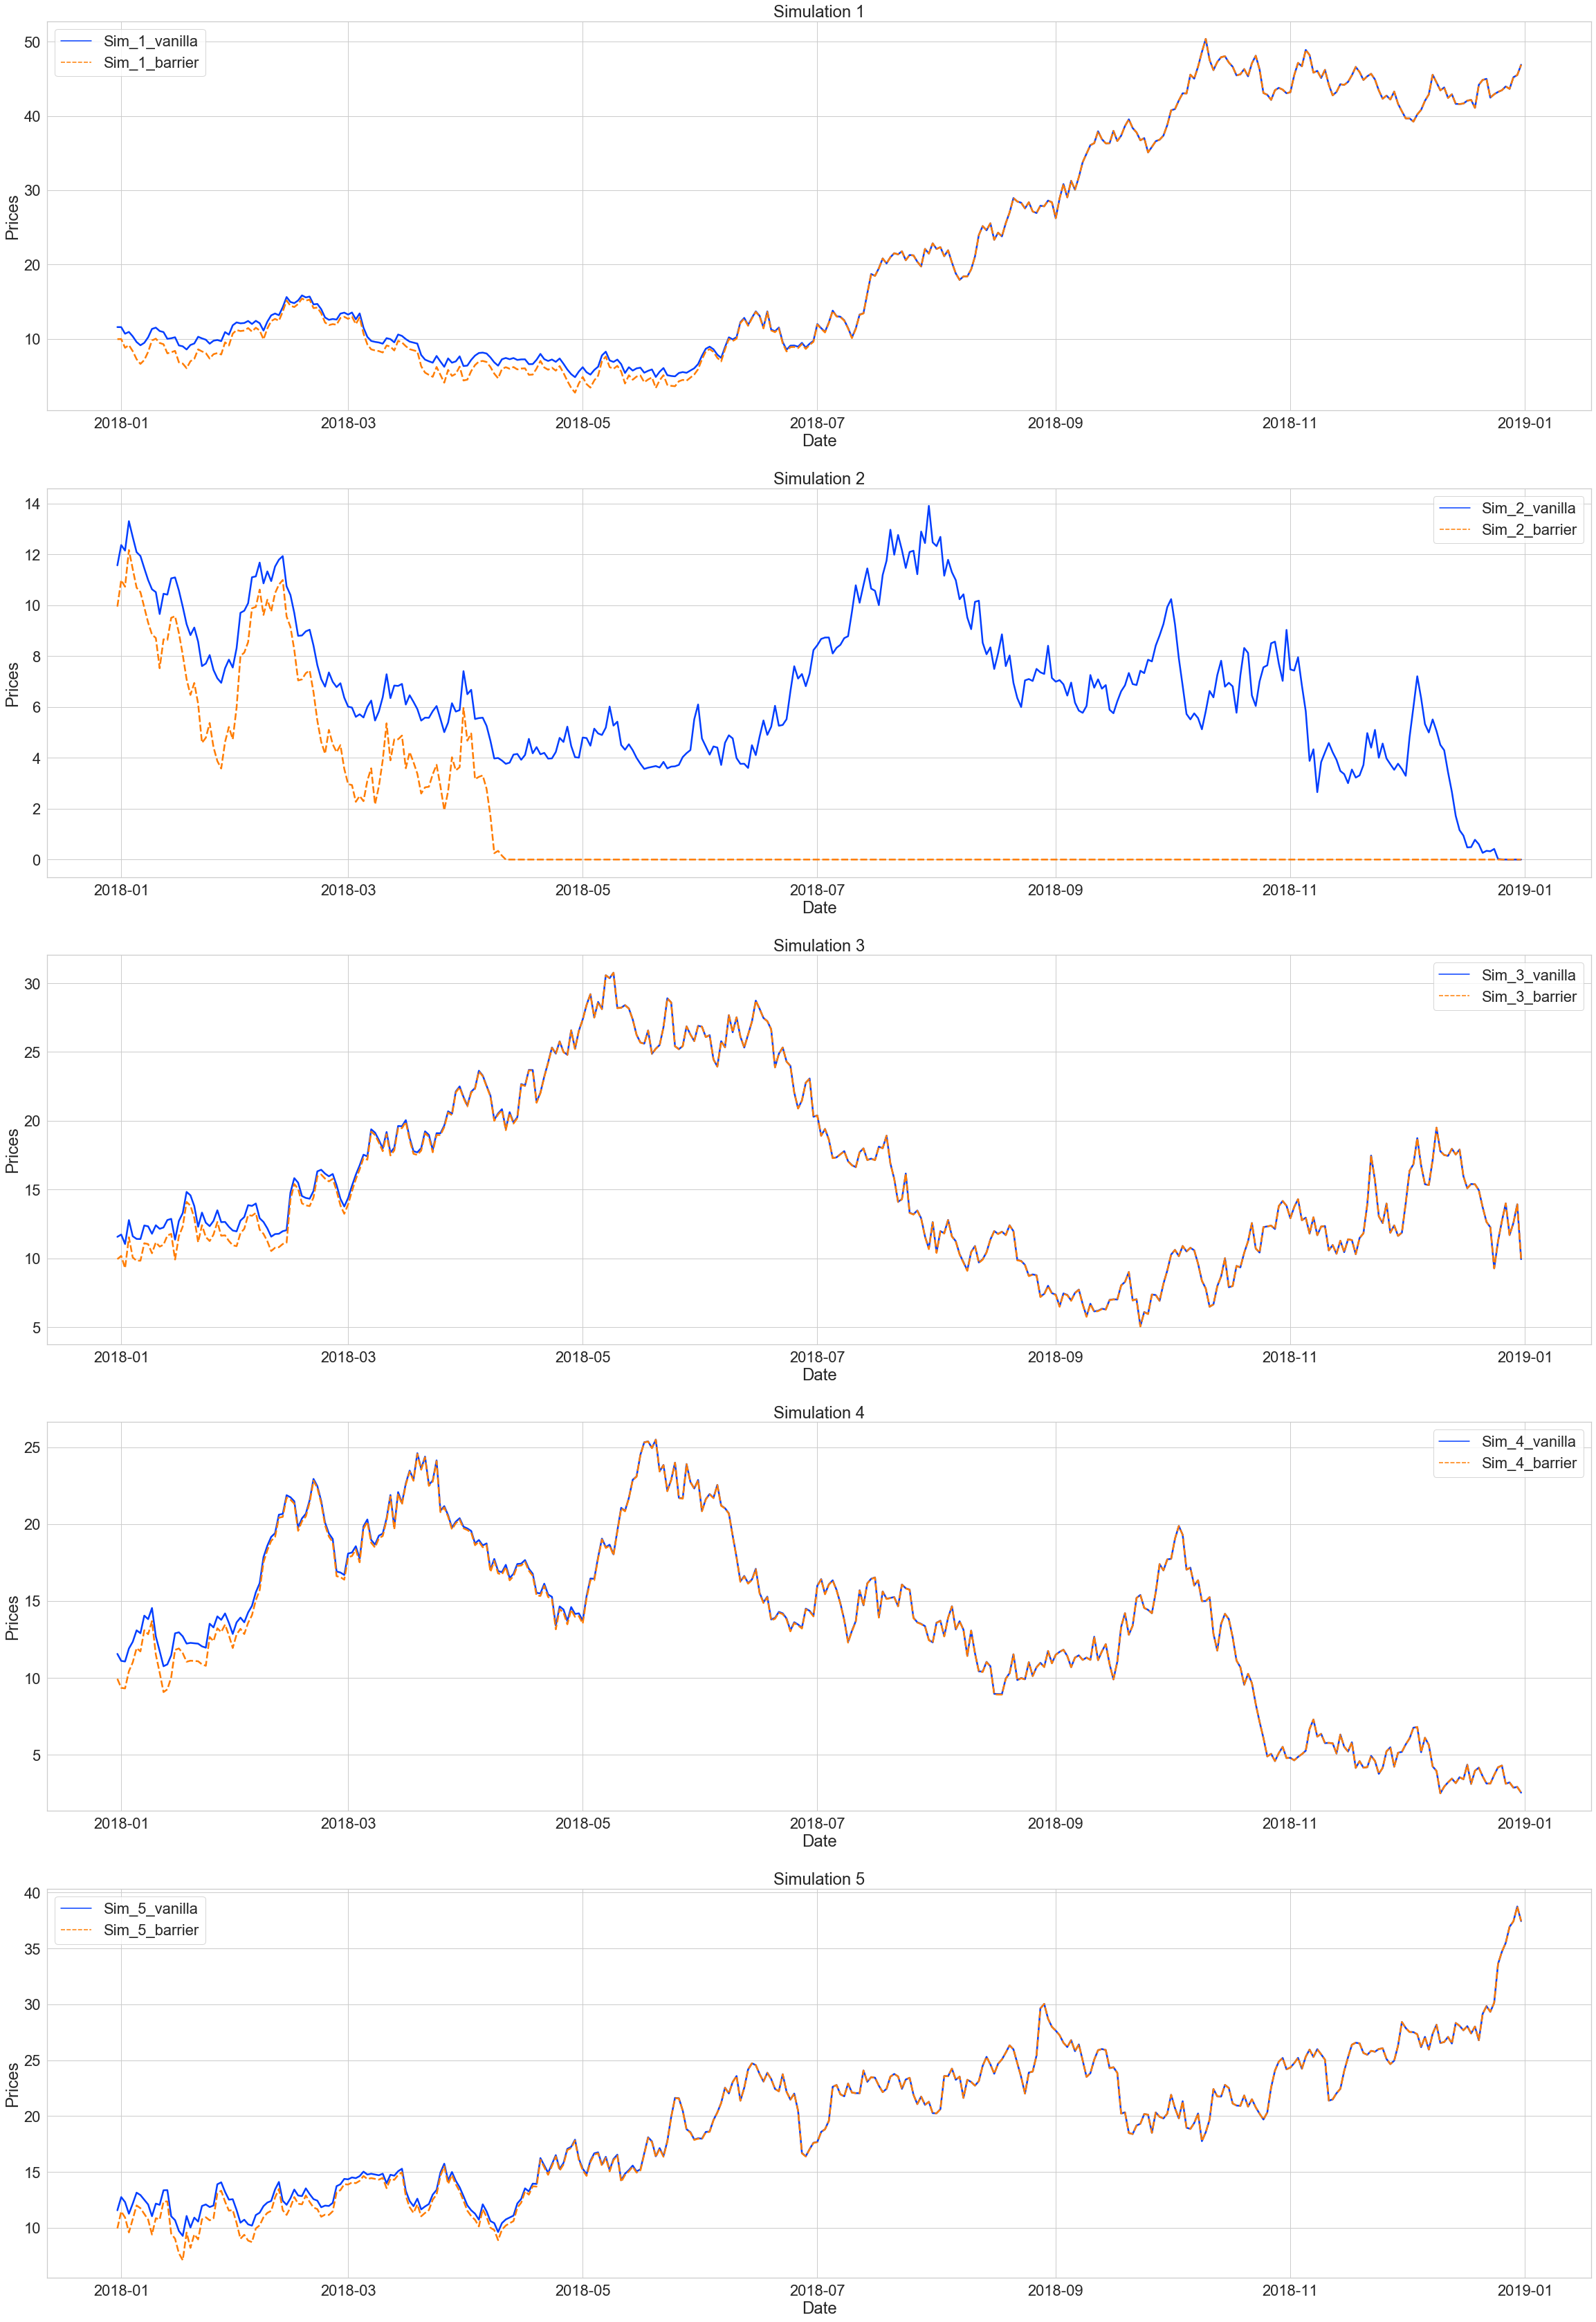

In [10]:
plt.figure(figsize=(40, 60))
sns.set(style="whitegrid", font_scale=2)
plt.subplot(5, 1, 1)
ax = sns.lineplot(
    data=sims[["Sim_1_vanilla", "Sim_1_barrier"]], palette="bright", linewidth=2.5)
ax.set(xlabel='Date', ylabel='Prices', title="Simulation 1")
plt.subplot(5, 1, 2)
ax = sns.lineplot(
    data=sims[["Sim_2_vanilla", "Sim_2_barrier"]], palette="bright", linewidth=2.5)
ax.set(xlabel='Date', ylabel='Prices', title="Simulation 2")
plt.subplot(5, 1, 3)
ax = sns.lineplot(
    data=sims[["Sim_3_vanilla", "Sim_3_barrier"]], palette="bright", linewidth=2.5)
ax.set(xlabel='Date', ylabel='Prices', title="Simulation 3")
plt.subplot(5, 1, 4)
ax = sns.lineplot(
    data=sims[["Sim_4_vanilla", "Sim_4_barrier"]], palette="bright", linewidth=2.5)
ax.set(xlabel='Date', ylabel='Prices', title="Simulation 4")
plt.subplot(5, 1, 5)
ax = sns.lineplot(
    data=sims[["Sim_5_vanilla", "Sim_5_barrier"]], palette="bright", linewidth=2.5)
ax.set(xlabel='Date', ylabel='Prices', title="Simulation 5")

### Remarks

 - Simulation 2 varies a lot around barrier so the probability it crosses the barrier is always high thus the barrier option price varies under the vanilla price.
 - After some point rest of the simulations varies far away from the barrier, resulting in lower probability of crossing the barrier thus barrier option price almost converges to vanilla price

# Pricing Asian options

Consider a one-year Asian call option struck at $103$ with $S_0 = 100$ , $\sigma = 0.2$ and $r = 0.1$ with daily setting dates.

## Plot of Arithmetic Average with Realization.

In [11]:
mv_avg = [100]  # Arithmetic Avg. initial Avg = initial price
prices = [100]
for a in range(1, len(sims)):
    mv_avg.append((sum(prices) + sims["Sim_1"][a])/(a+1))
    prices.append(sims["Sim_1"][a])

sims["art_mv_avg"] = mv_avg

[Text(0, 0.5, 'Prices'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Arithmetic Average - Realization')]

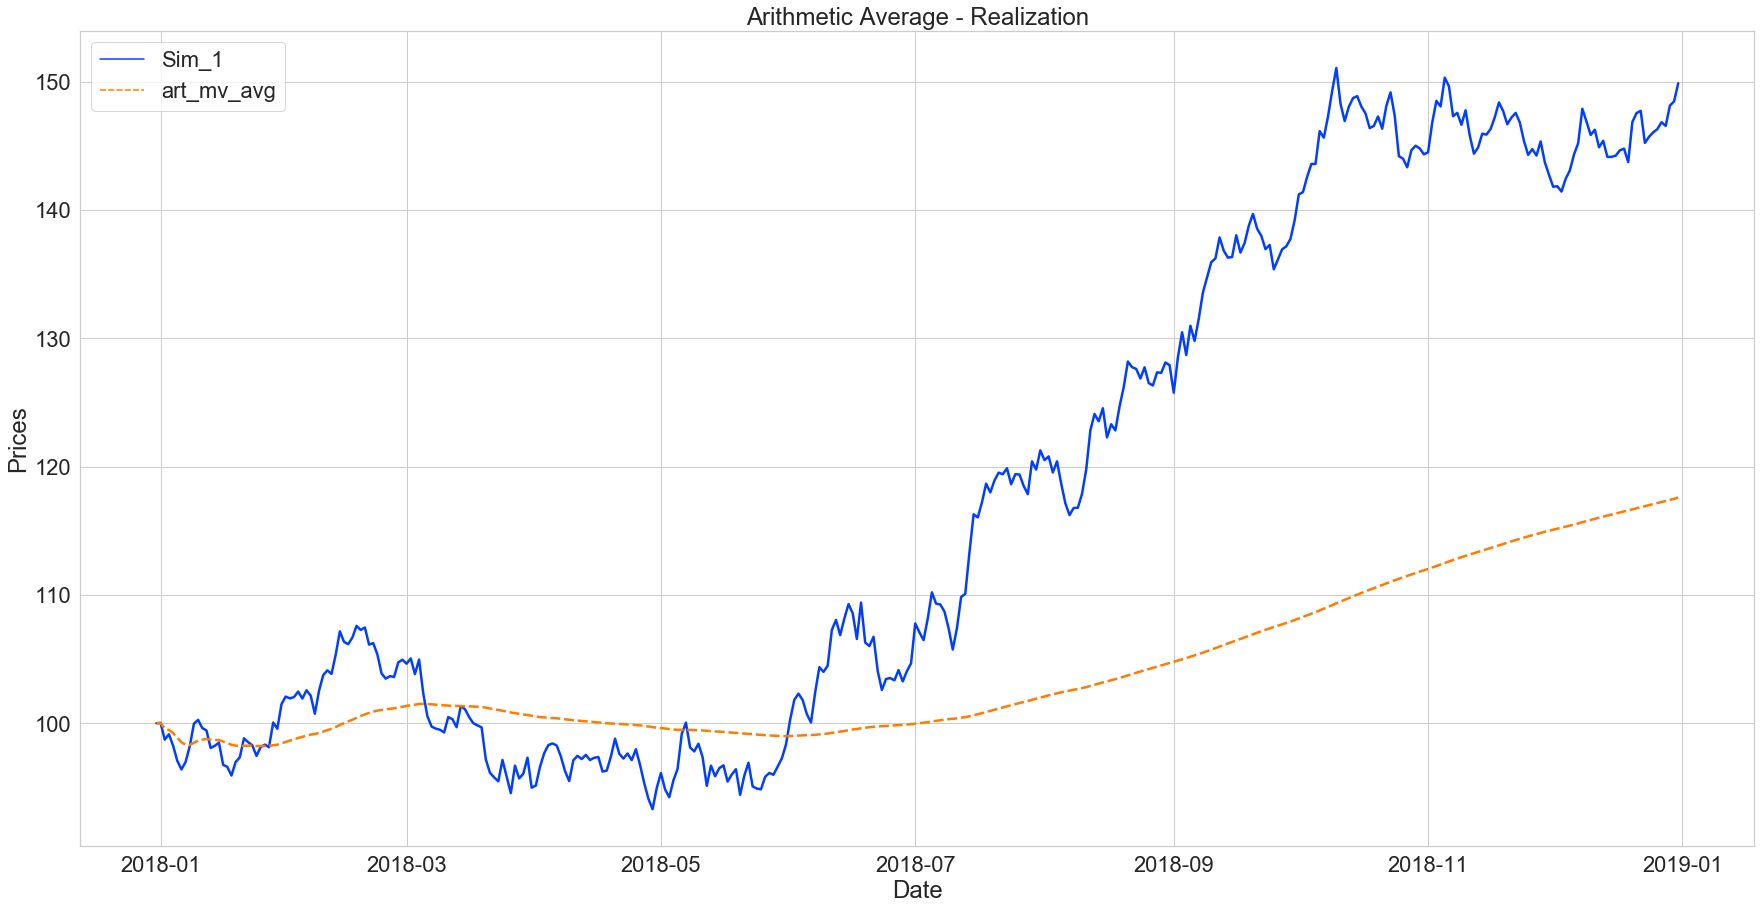

In [12]:
sns.set(style="whitegrid", font_scale=2)
plt.figure(figsize=(30, 15))
ax = sns.lineplot(data=sims[["Sim_1", "art_mv_avg"]],
                  palette="bright", linewidth=2.5)
ax.set(xlabel='Date', ylabel='Prices',
       title="Arithmetic Average - Realization")

## Monte-Carlo Simulation for Stock Prices

In [13]:
def monte_carlo(s_t, r, steps, T, vol, m):
    monte_carlos = pd.DataFrame()
    for a in range(m):
        # Generates random path with different seed at each a
        monte_carlos[a] = sim_spot(s_t, r, steps, T, vol)
    return monte_carlos                                   # for m times

## Pricing Asian Options for each t - First Method

$$C_t^A = e^{-r(T-t)}E\left(max\left(\frac{1}{T}\left(\int_0^t S_udu + S_t \int_0^{T-t} \frac{S_u}{S_0}du \right) - K, 0\right) \right)$$

Discretizing it:

$$\approx e^{-r(T-t)}E\left(max\left(\frac{1}{N+2}\left(\sum_{i=0}^n S_i + S_t \sum_{i=0}^{N-n} \frac{S_i}{S_0} \right) - K, 0\right) \right)$$

Approximating with Monte Carlo:

$$\approx e^{-r(T-t)} \frac{1}{m} \sum_k^m \left(max\left(\frac{1}{N+2}\left(\sum_{i=0}^n S_i + S_t \sum_{i=0}^{N-n} \frac{S_{i,k}}{S_0} \right) - K, 0\right) \right)$$

Using this method, we do not need to generate new Monte Carlo simulations at each step, since first term is the realized path and second term goes from $0$ to $T-t$ and $S_t$ is realized.

Where in time $0$, price is average over all monte carlos:

$$e^{-rT} \frac{1}{m} \sum_k^m \left(max\left(\frac{1}{N+1}\sum_{i=0}^{N} S_i - K, 0\right) \right)$$

***Defining Asian Functions***

In [14]:
def asian_0(mcs, k, r, T):
    payoffs = []
    for a in mcs.columns:
        payoffs.append(max((sum(mcs[a])/(len(mcs))) - k, 0))
    #  Price at time 0 - Payoff(Average over all Monte-Carlos)
    return(np.exp(-r*T)*(1/len(mcs.columns))*sum(payoffs))


def asian_t(mcs, k, realized, n, N, t, T):
    payoffs = []
    first_term = sum(realized[:n+1])
    for a in mcs.columns:
        second_term = realized[n]*(sum(mcs[a][:N-n+1]))/realized[0]
        payoffs.append(max((1/(N+2))*(first_term + second_term)-k, 0))
    return(np.exp(-r*(T-t))*(1/len(mcs.columns))*sum(payoffs))

In [15]:
#  1000 different simulations
monte_carlos = monte_carlo(s_0, r, n-1, T, vol, 100)
#  Taking first simulation from first question as realized path
prices_1 = list(sims["Sim_1"])
steps_1 = list(sims["Steps"])
#  Using first Formula for initial price
asian_prices = [asian_0(monte_carlos, K, r, T)]

for a in range(1, len(prices_1)):
    if steps_1[a] != steps_1[-1]:
        asian_prices.append(
            asian_t(monte_carlos, K, prices_1, a, n, steps_1[a], steps_1[-1]))
    else:
        asian_prices.append(max(np.mean(prices_1) - K, 0))

sims["Sim_1_Asian"] = asian_prices

[Text(0, 0.5, 'Prices'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Vanilla Call - Asian Call')]

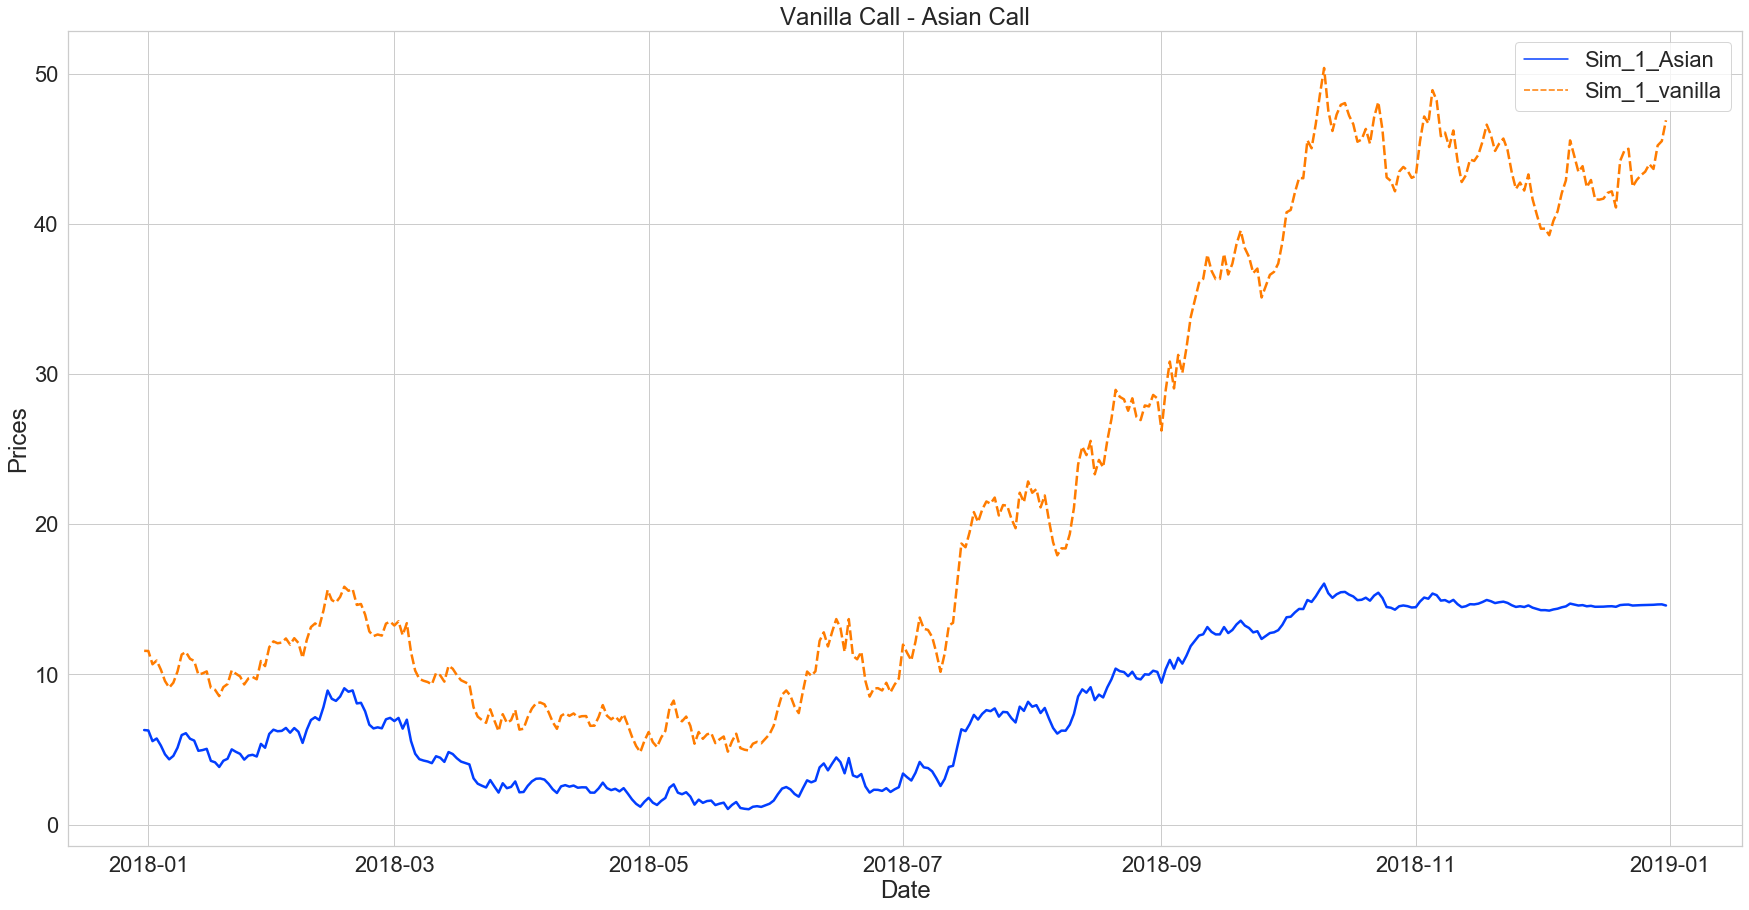

In [16]:
sns.set(style="whitegrid", font_scale=2)
plt.figure(figsize=(30, 15))
ax = sns.lineplot(
    data=sims[["Sim_1_Asian", "Sim_1_vanilla"]], palette="bright", linewidth=2.5)
ax.set(xlabel='Date', ylabel='Prices', title="Vanilla Call - Asian Call")

### Remarks - First Method

 - Asian price always below the vanilla price, reason being it smooths the path spot follows thus it smooths the volatility of the stock. Since volatility of the moving average is lower than actual price volatility, asian price is lower than vanilla price.
 - Also, because moving average in general follows a path below the actual stock price, Asian is cheaper than Vanilla call. If the stock price goes down a lot and the arithmetic average goes over true price for a certain amount, Vanilla call can go down to level of Asian price. Since arithmetic average smooths the large movements, Asian price will not go down as much as Vanilla and prices may cross.
 - In this particular simulation we do not observe this behaviour.

## Pricing Asian Options for each t - Second Method

This method simulates conditional expectation at each step.

$$C_t^A = e^{-r(T-t)}E\left(max\left(\frac{1}{T}\left(\int_0^t S_udu + S_t \int_t^{T} \frac{S_u}{S_t}du \right) - K, 0\right)\bigl\vert \ S_t \right)$$

Discretizing it:

$$\approx e^{-r(T-t)}E\left(max\left(\frac{1}{N+2}\left(\sum_{i=0}^n S_i + S_t \sum_{i=n}^{N} \frac{S_i}{S_t} \right) - K, 0\right) \bigl\vert \ S_t \right)$$

Approximating with Monte Carlo:

$$\approx e^{-r(T-t)} \frac{1}{m} \sum_k^m \left(max\left(\frac{1}{N+2}\left(\sum_{i=0}^n S_i + S_t \sum_{i=n}^{N} \frac{S_{i,k\mid S_t}}{S_t} \right) - K, 0\right) \right)$$

In this method we cannot use same monte-carlo simulations at each step because we are not doing change of variable. Since, random part of the expectation, integral is from $t$ to $T$ and the $S_u$ is dependent on $S_t$(starting point of the path) we need to do new monte-carlo at each by taking last realized observation as our starting point.

Where in time $0$, price is average over all monte carlos since starting point is $S_0$ at time $0$:

$$e^{-rT} \frac{1}{m} \sum_k^m \left(max\left(\frac{1}{N+1}\sum_{i=0}^{N} S_i - K, 0\right) \right)$$

In [17]:
#  Asian function for conditional expectation simulation.
def asian_cond(mcs, k, realized, n, N, t, T):
    payoffs = []
    first_term = sum(realized[:n+1])
    for a in mcs.columns:
        #  Summing over whole simulation since we are simulating from t to T(rather than 0 to T-t)
        second_term = sum(mcs[a])
        payoffs.append(max((1/(N+2))*(first_term + second_term)-k, 0))
    return(np.exp(-r*(T-t))*(1/len(mcs.columns))*sum(payoffs))

### Vanilla - Asian Prices using 100 simulations at each step

In [18]:
#  100 different simulations for initial price
monte_carlos = monte_carlo(s_0, r, n-1, T, vol, 100)
#  Taking first simulation from first question as realized path
prices_1 = list(sims["Sim_1"])
steps_1 = list(sims["Steps"])
#  Using first Formula for initial price
asian_prices = [asian_0(monte_carlos, K, r, T)]

for a in range(1, len(prices_1)):
    if steps_1[a] != steps_1[-1]:
        # Generating new simulations from t to T at each t.
        mcs = monte_carlo(prices_1[a], r, n-a, T, vol, 100)
        asian_prices.append(asian_cond(
            mcs, K, prices_1, a, n, steps_1[a], steps_1[-1]))
    else:
        asian_prices.append(max((np.mean(prices_1) - K, 0)))

sims["Sim_1_Asian_cond_100"] = asian_prices

[Text(0, 0.5, 'Prices'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Vanilla Call - Asian Call')]

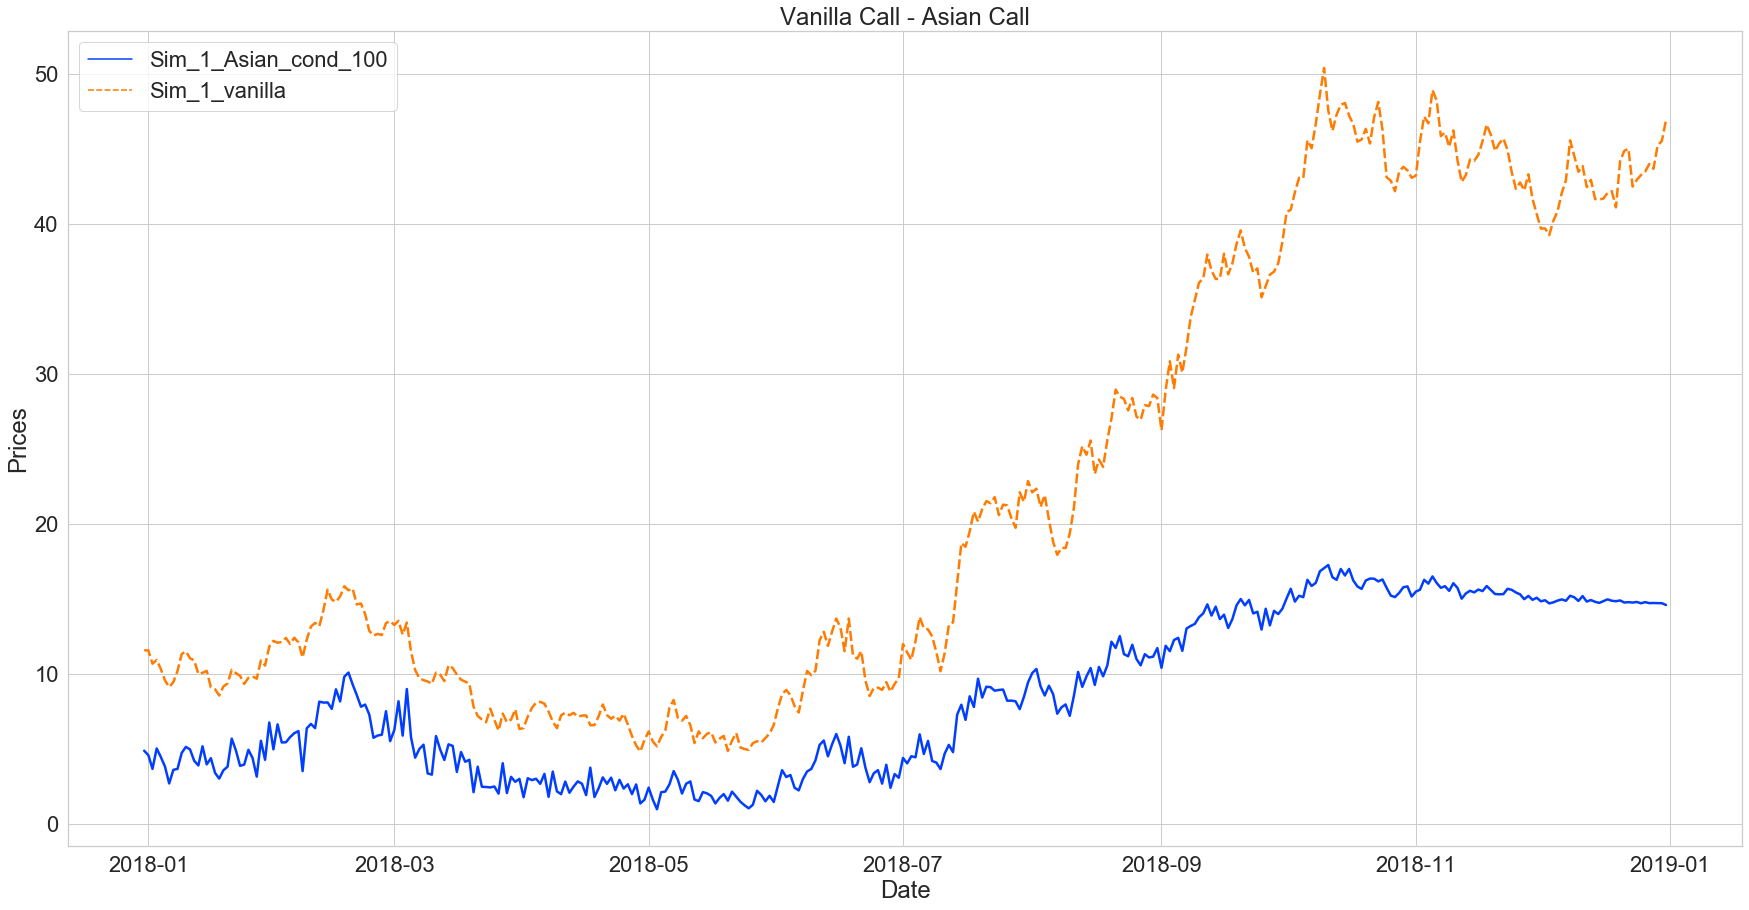

In [19]:
sns.set(style="whitegrid", font_scale=2)
plt.figure(figsize=(30, 15))
ax = sns.lineplot(data=sims[["Sim_1_Asian_cond_100",
                             "Sim_1_vanilla"]], palette="bright", linewidth=2.5)
ax.set(xlabel='Date', ylabel='Prices', title="Vanilla Call - Asian Call")

### Vanilla - Asian Prices using 1000 simulations at each step

In [20]:
#  1000 different simulations for initial price
monte_carlos = monte_carlo(s_0, r, n-1, T, vol, 1000)
#  Taking first simulation from first question as realized path
prices_1 = list(sims["Sim_1"])
steps_1 = list(sims["Steps"])
#  Using first Formula for initial price
asian_prices = [asian_0(monte_carlos, K, r, T)]

for a in range(1, len(prices_1)):
    if steps_1[a] != steps_1[-1]:
        # Generating new simulations from t to T at each t.
        mcs = monte_carlo(prices_1[a], r, n-a, T, vol, 1000)
        asian_prices.append(asian_cond(
            mcs, K, prices_1, a, n, steps_1[a], steps_1[-1]))
    else:
        asian_prices.append(max((np.mean(prices_1) - K, 0)))

sims["Sim_1_Asian_cond_1000"] = asian_prices

[Text(0, 0.5, 'Prices'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Vanilla Call - Asian Call')]

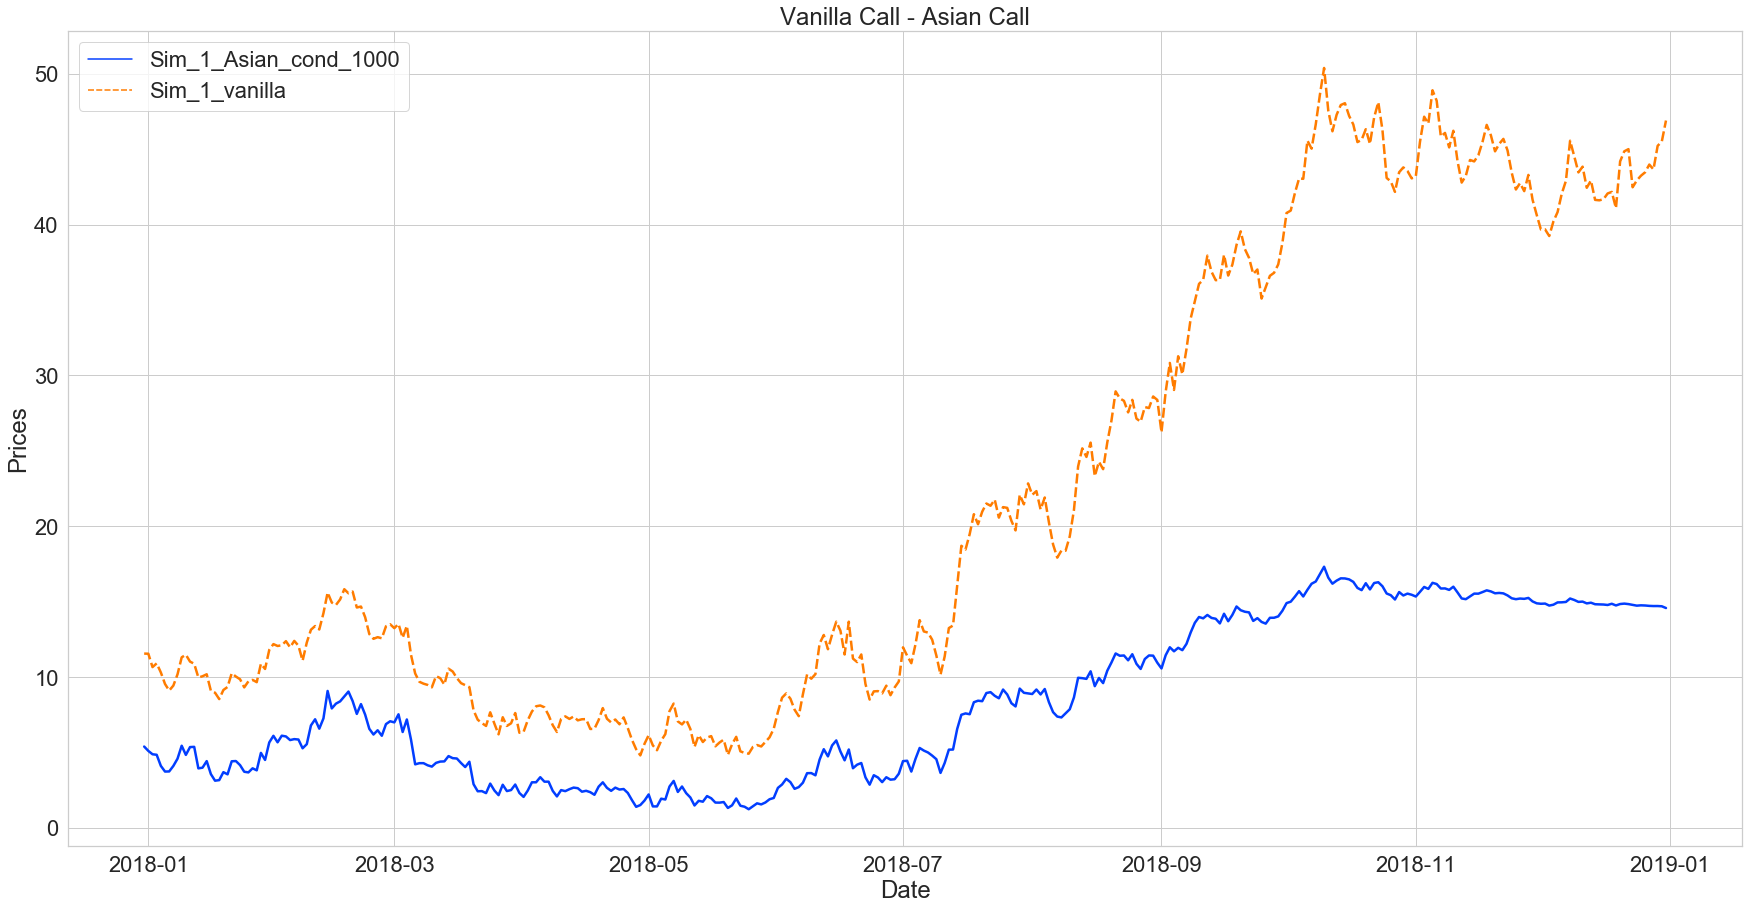

In [21]:
sns.set(style="whitegrid", font_scale=2)
plt.figure(figsize=(30, 15))
ax = sns.lineplot(data=sims[["Sim_1_Asian_cond_1000",
                             "Sim_1_vanilla"]], palette="bright", linewidth=2.5)
ax.set(xlabel='Date', ylabel='Prices', title="Vanilla Call - Asian Call")

### Remarks - Second Method

 - When we use the same number of simulations that we used in first method, we get a more noisy path for Asian prices.
 - When we increase the number of simulations we do at each step, we see that path Asian price follows is smoother.
 - This makes sense in the sense that; as we decrease the length of the interval(number of steps we simulate over) we take the average over, moving average smooths the spot less and less thus the path becomes more noisy. Thus we need to increase the number of simulations for average over all simulations to converge to true expectation.
 - Considering computing power, it is beneficial to use change of variable and simulate all the simulations at start rather than simulating them at each step.